### Video Games Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"C:\Users\shiva\Downloads\videogames_data.csv")
df.head(4)

#df=df[df.duplicated()]
df=df.drop_duplicates()
df["Region"]=df["Region"].fillna("South")
df["Publisher"]=df["Publisher"].fillna("Nintendo")
df["NA_sales"]=df["NA_sales"].replace("[$]",'',regex=True)
df["Country"]=df["Country"].replace({"USA":"United States"})
df["Country"]=df["Country"].str.title()                
df=df.rename(columns={"NA_sales":"National Sales","Global_Sales":"Global Sales","NA_Profit":"National Profit","Global_Profit":"Global Profit"})
df["National Sales"]=pd.to_numeric(df["National Sales"],errors="coerce")

#handling outliers(National Sales,Global Sales,National Profit,Global Profit)
q1=df["National Sales"].quantile(0.25) 
q2=df["National Sales"].quantile(0.50)
q3=df["National Sales"].quantile(0.75)
IQR=q3-q1
upper_fence=q3+(1.5*IQR)
lower_fence=q1-(1.5*IQR)
df["National Sales"]=np.where(df["National Sales"]>upper_fence,upper_fence,df["National Sales"])


q1=df["Global Sales"].quantile(0.25) 
q2=df["Global Sales"].quantile(0.50)
q3=df["Global Sales"].quantile(0.75)
IQR=q3-q1
upper_fence=q3+(1.5*IQR)
lower_fence=q1-(1.5*IQR)
df["Global Sales"]=np.where(df["Global Sales"]>upper_fence,upper_fence,df["Global Sales"])


q1=df["National Profit"].quantile(0.25) 
q2=df["National Profit"].quantile(0.50)
q3=df["National Profit"].quantile(0.75)
IQR=q3-q1
upper_fence=q3+(1.5*IQR)
lower_fence=q1-(1.5*IQR)
df["National Profit"]=np.where(df["National Profit"]>upper_fence,upper_fence,df["National Profit"])

q1=df["Global Profit"].quantile(0.25) 
q2=df["Global Profit"].quantile(0.50)
q3=df["Global Profit"].quantile(0.75)
IQR=q3-q1
upper_fence=q3+(1.5*IQR)
lower_fence=q1-(1.5*IQR)
df["Global Profit"]=np.where(df["Global Profit"]>upper_fence,upper_fence,df["Global Profit"])

#sns.boxplot(x="National Profit",data=df)


### 1.How do the top 5 games by national sales differ from those by global sales?

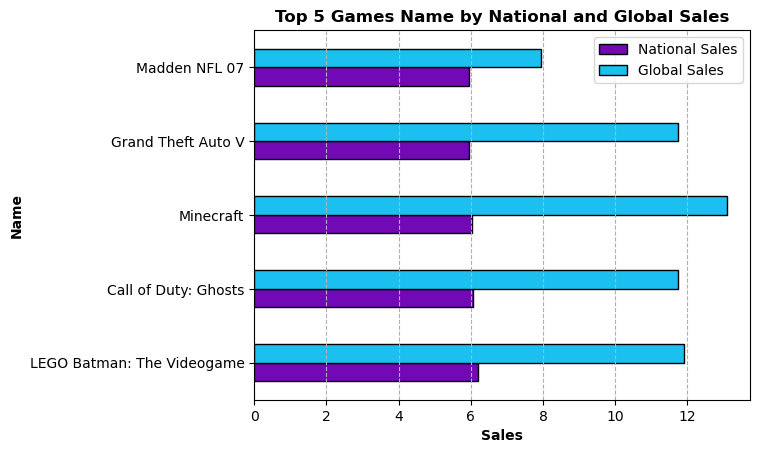

In [2]:
sales_comparison = df.groupby('Name').agg({'National Sales': 'sum' ,'Global Sales': 'sum'}).reset_index().sort_values(by='National Sales', ascending=False)

sales_comparison= sales_comparison.head(5)

sales_comparison.plot.barh(x='Name', y=['National Sales', 'Global Sales'], color=["#7209B7", "#1CC0F0"],edgecolor="black")
plt.title('Top 5 Games Name by National and Global Sales',fontweight="bold")
plt.xlabel('Sales',fontweight="bold")
plt.ylabel('Name',fontweight="bold")
plt.grid(axis="x",linestyle='--')
plt.show()

Minecraft leads globally in sales, while LEGO Batman excels nationally, reflecting differing market dynamics.

### 2.How do sales vary by country or region?


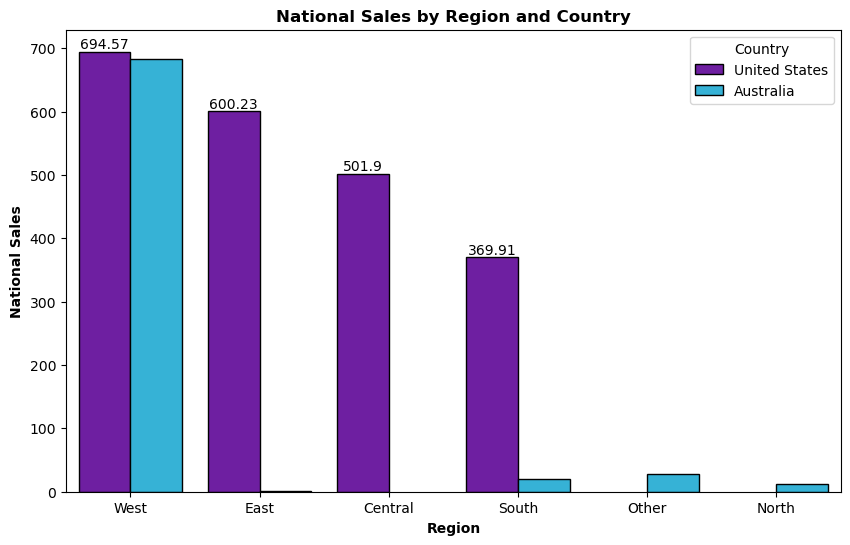

In [3]:
National_Sales=df.groupby(["Region","Country"])["National Sales"].sum().reset_index().sort_values(by="National Sales",ascending=False)
plt.figure(figsize=(10,6))
ax=sns.barplot(x="Region",y="National Sales",hue="Country",data=National_Sales,palette=["#7209B7", "#1CC0F0"],edgecolor="black")
ax.bar_label(ax.containers[0])
plt.title("National Sales by Region and Country",fontweight="bold")
plt.xlabel("Region",fontweight="bold")
plt.ylabel("National Sales",fontweight="bold")
plt.show()

In both the United States and Australia, the western region shows the highest national sales.

### 3.Which game genres generate the most sales?


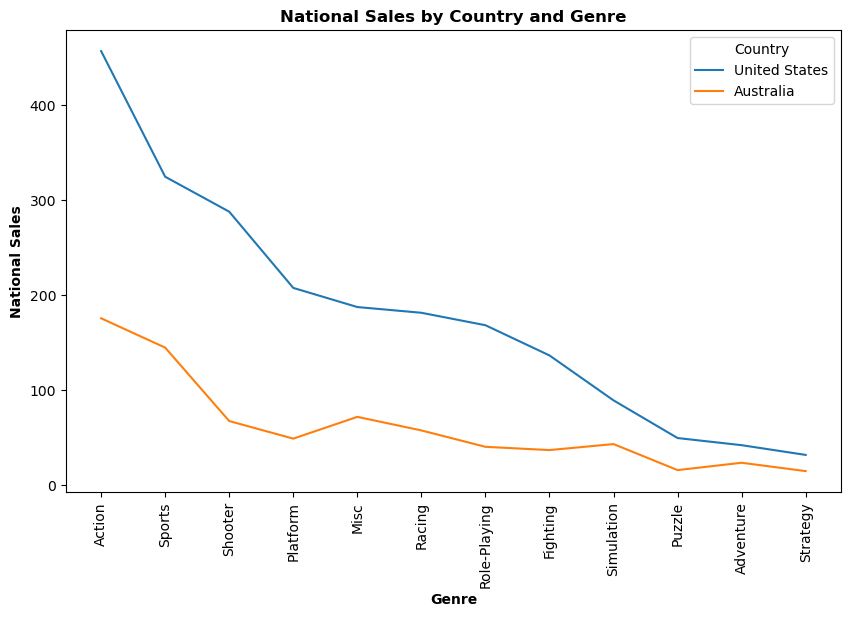

In [4]:
National_Sales=df.groupby(["Genre","Country"])["National Sales"].sum().reset_index().sort_values(by="National Sales",ascending=False)

plt.figure(figsize=(10,6))
sns.lineplot(x="Genre",y="National Sales",hue="Country",data=National_Sales)
plt.xticks(rotation=90)
plt.title("National Sales by Country and Genre",fontweight="bold")
plt.xlabel("Genre",fontweight="bold")
plt.ylabel("National Sales",fontweight="bold")
plt.show()

The United States leads in video game sales across all genres, with Action being the most popular, while Australia shows lower sales in all categories.

### 4.Which platforms generate the most sales overall? 



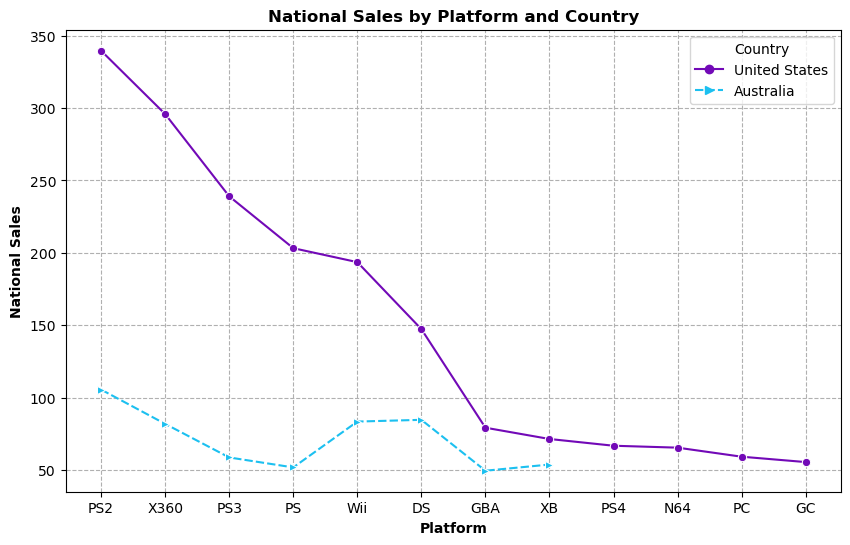

In [5]:
National_Global_Sales=df.groupby(["Platform","Country"])["National Sales"].sum().reset_index().sort_values(by="National Sales",ascending=False)

National_Global_Sales=National_Global_Sales.head(20)
plt.figure(figsize=(10,6))
sns.lineplot(x="Platform",y="National Sales",hue="Country",data=National_Global_Sales,palette=["#7209B7", "#1CC0F0"],markers=["o",">"],style="Country")
plt.title("National Sales by Platform and Country",fontweight="bold")
plt.xlabel("Platform",fontweight="bold")
plt.ylabel("National Sales",fontweight="bold")
plt.grid(linestyle="--")
plt.show()

PS2 and X360 performed well in terms of sales, but over time, there is a noticeable decline in sales for newer platforms.

### What is the Average Sales by Genre across National and Global Markets?



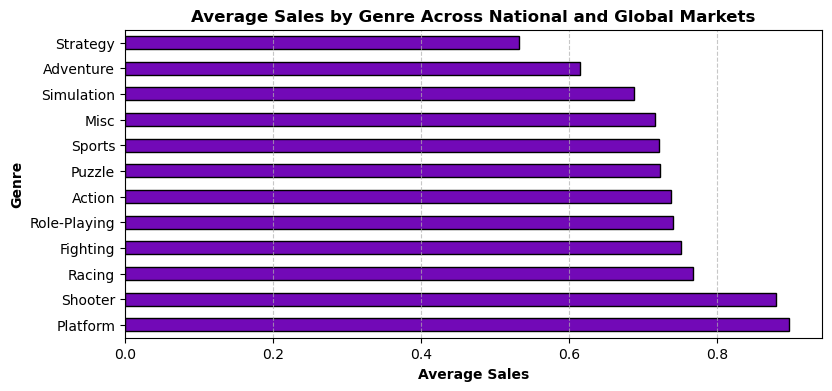

In [6]:
df['Average Sales'] = (df['National Sales'] + df['Global Sales']) / 2
average_sales_by_genre = df.groupby('Genre')['Average Sales'].mean().sort_values(ascending=False)

average_sales_by_genre.plot.barh(color="#7209B7", figsize=(9, 4),edgecolor="black")
plt.title("Average Sales by Genre Across National and Global Markets", fontweight="bold")
plt.xlabel("Average Sales", fontweight="bold")
plt.ylabel("Genre", fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The bar chart shows that Action games have the highest average sales across national and global markets, followed by Adventure and Comedy games.

### 6.How do National Sales compare to Global Sales for each country? 

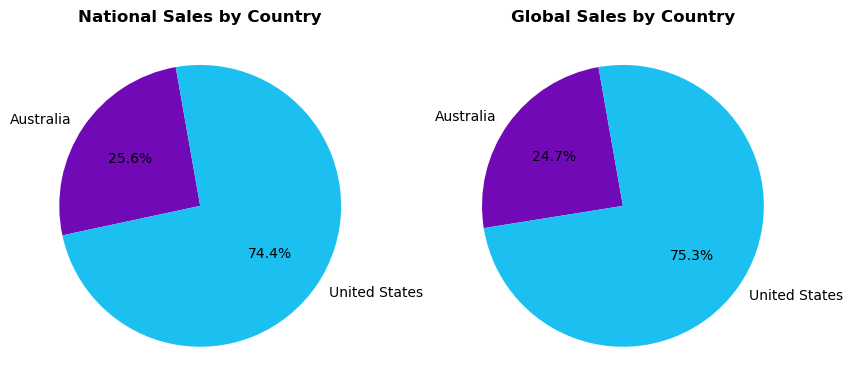

In [7]:
Sales=df.groupby(["Country"])[["National Sales","Global Sales"]].sum()
Country_sale=Sales.index
National_Sales=Sales["National Sales"]
Global_Sales=Sales["Global Sales"]
color=["#7209B7", "#1CC0F0"]

fig, axs=plt.subplots(1,2,figsize=(10,6))
axs[0].pie(National_Sales,labels=Country_sale,autopct="%1.1f%%",startangle=100,colors=color)
axs[0].set_title('National Sales by Country',fontweight="bold")

axs[1].pie(Global_Sales,labels=Country_sale,autopct="%1.1f%%",startangle=100,colors=color)
axs[1].set_title('Global Sales by Country',fontweight="bold")
plt.show()

These pie charts show that the United States, contributing around 74-75%, while Australia accounts for roughly 24-25%.

### 7.How have National and Global Sales changed over the years?


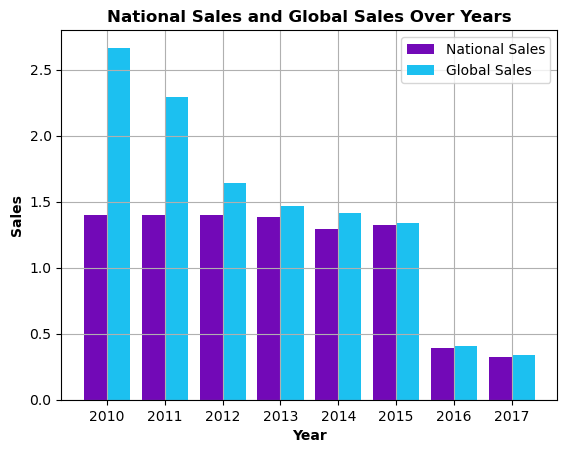

In [8]:
width = 0.4

plt.bar(df["Year"] - width / 2, df["National Sales"], color="#7209B7", width=width, label="National Sales")
plt.bar(df["Year"] + width / 2, df["Global Sales"], color="#1CC0F0", width=width, label="Global Sales")

plt.title("National Sales and Global Sales Over Years",fontweight="bold")
plt.xlabel("Year",fontweight="bold")
plt.ylabel("Sales",fontweight="bold")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

This plot showing fluctuations in both categories with national sales varying more than global sales.

### 8.How do national sales compare to global sales for different publishers? 



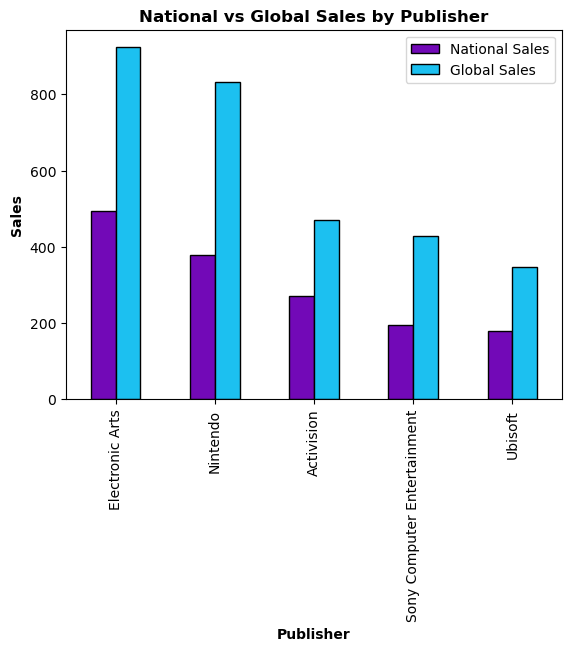

In [11]:
sales_comparison = df.groupby('Publisher').agg({'National Sales': 'sum' ,'Global Sales': 'sum'}).reset_index().sort_values(by='National Sales', ascending=False)

sales_comparison= sales_comparison.head(5)

sales_comparison.plot(x='Publisher', y=['National Sales', 'Global Sales'],kind="bar",color=["#7209B7", "#1CC0F0"],edgecolor="black")
plt.title('National vs Global Sales by Publisher',fontweight="bold")
plt.xlabel('Publisher',fontweight="bold")
plt.ylabel('Sales',fontweight="bold")
plt.show()

Publishers like Electronic Arts and Nintendo performed well in terms of National and Global sales.

# Conclusion:
Minecraft leads globally, while LEGO Batman excels nationally. The U.S. shows higher sales, especially in Action games, with the western region leading nationally. PS2 and X360 performed well, but newer platforms declined. Action games have the highest average sales. The U.S. contributes 74-75% of sales, while Australia accounts for 24-25%. Electronic Arts and Nintendo are top performers.






